# Predicting Indian Liver Patient

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [57]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [58]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [59]:
liver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,44.586000,16.533400,4.0,32.750,45.0,58.00,85.0
Total_Bilirubin,500.0,2.603800,5.120238,0.4,0.800,0.9,2.20,75.0
Direct_Bilirubin,500.0,1.117200,2.066709,0.1,0.200,0.3,1.00,14.2
Alkaline_Phosphotase,500.0,296.372000,257.461676,63.0,175.000,205.5,298.00,2110.0
Alamine_Aminotransferase,500.0,82.736000,194.366775,10.0,23.000,33.5,59.25,2000.0
Aspartate_Aminotransferase,500.0,108.820000,307.093557,10.0,24.750,40.0,79.25,4929.0
Total_Protiens,500.0,6.444800,1.089020,2.7,5.700,6.5,7.20,9.6
Albumin,500.0,3.168800,0.799741,0.9,2.600,3.1,3.80,5.5
Albumin_and_Globulin_Ratio,496.0,0.960907,0.294289,0.3,0.795,1.0,1.10,1.9
Liver_Problem,500.0,1.300000,0.458717,1.0,1.000,1.0,2.00,2.0


In [60]:
# Encode male as 1 and female as -1

liver_data["Male"] = liver_data["Gender"].map({"Male":1, "Female":0})

In [61]:
#drop the gender column

liver_data = liver_data.drop(columns=["Gender"])

In [62]:
#Encode Liver_Disease column in binary

liver_data["Liver_Problem"] = liver_data["Liver_Problem"].map({1:1, 2:0})

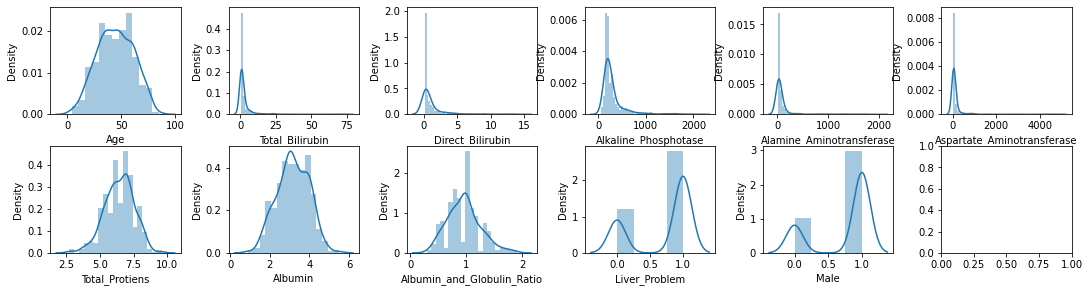

In [63]:
plot_rows = 2
plot_columns = 6

fig, ax = plt.subplots(nrows = plot_rows, ncols= plot_columns, figsize=(15, 4))
plt.tight_layout()

index = 0
cols = liver_data.columns

for i in range(plot_rows):
    for j in range(plot_columns):
        if index < 11:
            sns.distplot(liver_data[cols[index]], ax = ax[i, j])
            index = index + 1;

In [64]:
liver_data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
Male                          0
dtype: int64

In [65]:
# have null values in "Albumin_and_Globulin_Ratio" variable. 
# replace null with mean of the variable

mean = liver_data["Albumin_and_Globulin_Ratio"].mean()
liver_data["Albumin_and_Globulin_Ratio"] = liver_data["Albumin_and_Globulin_Ratio"].fillna(mean)

In [66]:
#test-train-split
X = liver_data.drop(columns=["Liver_Problem"])
y = liver_data["Liver_Problem"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [67]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('RFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))

results = []
names=[]
for name, pipe in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.708250 (0.049403)
KNN: 0.655980 (0.063363)
CART: 0.616445 (0.096368)
NB: 0.517165 (0.075208)
LDA: 0.701052 (0.040371)
SVM: 0.715393 (0.034538)
RFC: 0.682226 (0.025564)


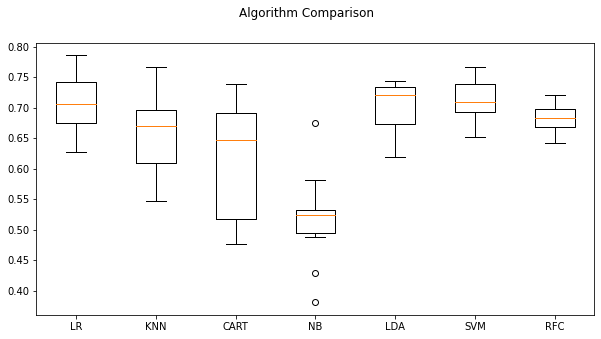

In [68]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
# We notice that SVM performs the best on our training data cloesly followed by Logistic Regression.

# We will train Logistic Regression (as it is an easy-to-explain model) on our data and use to to predict new data.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred_train = log_reg.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))
print("Train Accuracy: ",log_reg.score(X_train, y_train))

[[ 15 106]
 [ 12 292]]
Train Accuracy:  0.7223529411764706


In [71]:
report_train = classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.56      0.12      0.20       121
           1       0.73      0.96      0.83       304

    accuracy                           0.72       425
   macro avg       0.64      0.54      0.52       425
weighted avg       0.68      0.72      0.65       425



In [72]:
y_pred_test = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))
print("Test Accuracy: ", log_reg.score(X_test, y_test))

[[ 5 24]
 [ 2 44]]
Test Accuracy:  0.6533333333333333


In [73]:
report_test = classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.71      0.17      0.28        29
           1       0.65      0.96      0.77        46

    accuracy                           0.65        75
   macro avg       0.68      0.56      0.52        75
weighted avg       0.67      0.65      0.58        75



In [74]:
liver_data_submit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv")

In [75]:
# perform manual transformations on liver_data_submit

liver_data_submit["Male"] = liver_data_submit["Gender"].map({"Male":1, "Female":0})
liver_data_submit = liver_data_submit.drop(columns=["Gender"])

In [76]:
#make predictions and save them in a csv

X_submit = scaler.transform(liver_data_submit)
y_submit = log_reg.predict(X_submit)

y_submit = pd.DataFrame(y_submit, columns=["prediction"])
filename = "s5_predicting_indian_liver_patient.csv"
y_submit.to_csv(filename, index=False)